<a href="https://colab.research.google.com/github/Madhusree18/SD03QO4CURNEU/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import preprocessing as prepro
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
estimated = pd.read_csv('/content/estimated_numbers.csv')
incidence = pd.read_csv('/content/incidence_per_1000_pop_at_risk.csv')
reported = pd.read_csv('/content/reported_numbers.csv')
test = incidence[:107]

In [3]:
reported = pd.concat([reported, pd.get_dummies(reported['Country'])], axis=1)

In [6]:
cols = ['Country', 'WHO Region']
for col in cols:
    le = LabelEncoder()
    letest = LabelEncoder()
    reported[col] = le.fit_transform(reported[col])

In [7]:
reported['Incidence'] = (incidence['No. of cases'][107:]).reset_index(drop=True)
reported['Cases bin'] = pd.cut(reported['No. of cases'], bins=[0, 100, 1000, 10000, 100000, 1000000, 16000000], labels=[0, 1, 2, 3, 4, 5]).fillna(0)
reported['Incidence bin'] = pd.cut(reported['Incidence'], bins=[0, 0.3, 5, 45, 250, 800], labels=[0, 1, 2, 3, 4]).fillna(0)
reported = reported.fillna(0)

In [8]:
reported['Log no. of cases'] = (reported['No. of cases']+1).transform(np.log)
reported['Box Cox no. of cases'] = stats.boxcox(reported['No. of cases']+1)[0]

reported['Log WHO Region'] = (reported['WHO Region']+1).transform(np.log)
reported['Box Cox WHO Region'] = stats.boxcox(reported['WHO Region']+1)[0]

reported['Log Incidence'] = (reported['Incidence']+1).transform(np.log)
reported['Box Cox Incidence'] = stats.boxcox(reported['Incidence']+1)[0]

In [9]:
reported['Cases minmax'] = prepro.minmax_scale(reported[['No. of cases']])
reported['Cases standardized'] = prepro.StandardScaler().fit_transform(reported[['No. of cases']])
reported['Cases l2'] = prepro.normalize(reported[['No. of cases']])

reported['Incidence minmax'] = prepro.minmax_scale(reported[['Incidence']])
reported['Incidence standardized'] = prepro.StandardScaler().fit_transform(reported[['Incidence']])
reported['Incidence l2'] = prepro.normalize(reported[['Incidence']])

In [10]:
y = reported['No. of deaths']
X = reported.drop('No. of deaths', axis=1).reset_index(drop=True)

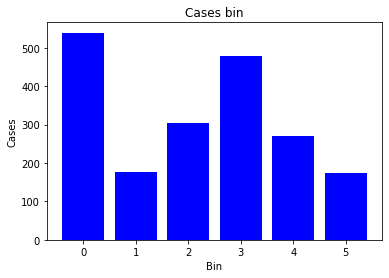

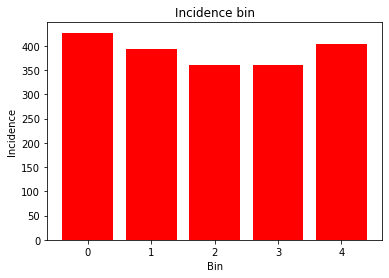

In [11]:
count=Counter(reported['Cases bin'])
plt.bar(count.keys(), count.values(), color='blue')
plt.title('Cases bin')
plt.ylabel('Cases')
plt.xlabel('Bin')
plt.show()

count=Counter(reported['Incidence bin'])
plt.bar(count.keys(), count.values(), color='red')
plt.title('Incidence bin')
plt.ylabel('Incidence')
plt.xlabel('Bin')
plt.show()

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = prepro.minmax_scale(X_train)
X_val = prepro.minmax_scale(X_val)

In [15]:
model = Sequential()

model.add(Dense(128, activation='relu', kernel_regularizer=l2(1.0), kernel_initializer='RandomUniform', input_dim=127))
model.add(BatchNormalization())
model.add(Dropout(0.325))

model.add(Dense(86, activation='relu', kernel_regularizer=l2(1.0), kernel_initializer='RandomUniform'))
model.add(BatchNormalization())
model.add(Dropout(0.325))

model.add(Dense(58, activation='relu', kernel_regularizer=l2(1.0), kernel_initializer='RandomUniform'))
model.add(BatchNormalization())
model.add(Dropout(0.325))

model.add(Dense(1, activation='sigmoid'))

model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer=Adam(lr=0.0001, epsilon=2e-06))
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=98, batch_size=32, steps_per_epoch=100)

Epoch 1/98
100/100 [==============================] - 0s 5ms/step - loss: -2532.2366 - accuracy: 0.2508 - val_loss: -136.2799 - val_accuracy: 0.0411
Epoch 2/98
100/100 [==============================] - 0s 3ms/step - loss: -6509.2969 - accuracy: 0.2647 - val_loss: -445.5575 - val_accuracy: 0.0411
Epoch 3/98
100/100 [==============================] - 0s 3ms/step - loss: -10816.7510 - accuracy: 0.2697 - val_loss: -1182.3843 - val_accuracy: 0.2314
Epoch 4/98
100/100 [==============================] - 0s 2ms/step - loss: -14338.5049 - accuracy: 0.2719 - val_loss: -2936.8408 - val_accuracy: 0.2468
Epoch 5/98
100/100 [==============================] - 0s 2ms/step - loss: -16456.6621 - accuracy: 0.2817 - val_loss: -5600.0645 - val_accuracy: 0.2545
Epoch 6/98
100/100 [==============================] - 0s 3ms/step - loss: -20056.7051 - accuracy: 0.2773 - val_loss: -9746.8096 - val_accuracy: 0.2622
Epoch 7/98
100/100 [==============================] - 0s 3ms/step - loss: -23703.0879 - accuracy: 

In [16]:
score = model.evaluate(X_val, y_val)
print('Accuracy: ' + str(score[1]) + ' Loss: ' + str(score[0]))

13/13 [==============================] - 0s 1ms/step - loss: -69412.4297 - accuracy: 0.2956
Accuracy: 0.2956298291683197 Loss: -69412.4296875
